<a href="https://colab.research.google.com/github/daixueq/6101/blob/main/Copy_of_MScFE_610_ECON_GWP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install statsmodels
!pip install pmdarima
!pip install pandas
!pip install arch
!pip install stats 
!pip install copulas


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import VECM
from scipy import stats
from pmdarima.arima import auto_arima
import arch
from scipy.stats import kurtosis
from statsmodels.tsa.stattools import adfuller


# 0. Data set selection and 1 Data Importing: 

Import (April 2020 through Dec 2020):

The equity ETF from outside the US: [Shares MSCI EAFE Value ETF(EFV)](https://etfdb.com/etf/EFV/#etf-ticker-profile)

The gold Exchange Traded Fund: [IAU iShares Gold Trust (IAU)](https://etfdb.com/etf/IAU/#etf-ticker-profile)

Bitcoin



In [ ]:
# The non-US Equity ETF
evf = yf.Ticker("EFV")
# Make sure this is the right ticker
print(evf.info['longName'])
print('Top 3 holding Names - holding Percent')
[print(h['holdingName'],"-",h['holdingPercent']) for h in evf.info['holdings'][:3]]
evf_df = evf.history(start="2020-03-31", end="2020-12-31")['Close']
evf_df.head()

iShares MSCI EAFE Value ETF
Top 3 holding Names - holding Percent
Novartis AG - 0.0241
Toyota Motor Corp - 0.0221
Commonwealth Bank of Australia - 0.0159


Date
2020-03-31    33.417919
2020-04-01    31.929144
2020-04-02    32.678211
2020-04-03    31.788694
2020-04-06    33.595825
Name: Close, dtype: float64

In [ ]:
# 1.2 the gold ETF - IAU iShares Gold Trust (IAU)
iau = yf.Ticker("IAU")
# Make sure this is the right ticker
print(iau.info['longName'])
iau_df = iau.history(start="2020-03-31", end="2020-12-31")['Close']
iau_df.head()

iShares Gold Trust


Date
2020-03-31    30.139999
2020-04-01    30.340000
2020-04-02    30.840000
2020-04-03    31.059999
2020-04-06    31.879999
Name: Close, dtype: float64

In [ ]:
# 1.3 BTC
btc = yf.Ticker("BTC-USD")
# Make sure this is the right ticker
print(btc.info['shortName'])
btc_df = btc.history(start="2020-03-31", end="2020-12-31")['Close']
btc_df.head()

Bitcoin USD


Date
2020-03-31    6438.644531
2020-04-01    6606.776367
2020-04-02    6793.624512
2020-04-03    6733.387207
2020-04-04    6867.527344
Name: Close, dtype: float64

# 2.Compute the daily returns

In [ ]:
#IAU is the gold ETF
iau_df = iau_df.to_frame(name="Price")
iau_df['Return'] = np.log(iau_df['Price']) - np.log(iau_df['Price'].shift(1))
iau_df = iau_df.dropna()
#EVF is the foreign stock ETF
evf_df = evf_df.to_frame(name="Price")
evf_df['Return'] = np.log(evf_df['Price']) - np.log(evf_df['Price'].shift(1))
evf_df = evf_df.dropna()
#BTC
btc_df = btc_df.to_frame(name="Price")
btc_df['Return'] = np.log(btc_df['Price']) - np.log(btc_df['Price'].shift(1))
btc_df = btc_df.dropna()

In [ ]:
btc_df.head()

,Price,Return
Date,,
2020-04-01,6606.776367,0.025778
2020-04-02,6793.624512,0.027889
2020-04-03,6733.387207,-0.008906
2020-04-04,6867.527344,0.019726
2020-04-05,6791.129395,-0.011187


# Data Summaries

Compute the returns, kurtosis(on daily returns) and extreme value for each series.


In [ ]:
#Returns
print("The Gold ETF return from Apr2020 to Dec2020 is {:.2%}".format((iau_df['Price'][-1] - iau_df['Price'][0]) / iau_df['Price'][0]),"\n")
print("The non-US ETF return from Apr2020 to Dec2020 is {:.2%}".format((evf_df['Price'][-1] - evf_df['Price'][0]) / evf_df['Price'][0]),"\n")
print("The Btc-USD return from Apr2020 to Dec2020 is {:.2%}".format((btc_df['Price'][-1] - btc_df['Price'][0]) / btc_df['Price'][0]),"\n")
print("The Gold ETF kurtosis is {:.2f}".format(kurtosis(iau_df.Return)),"\n")
print("The non-US ETF kurtosis is {:.2f}".format(kurtosis(evf_df.Return)),"\n")
print("The Btc-USD kurtosis is {:.2f}".format(kurtosis(btc_df.Return)),"\n")


The Gold ETF return from Apr2020 to Dec2020 is 18.98% 

The non-US ETF return from Apr2020 to Dec2020 is 43.19% 

The Btc-USD return from Apr2020 to Dec2020 is 338.97% 

The Gold ETF kurtosis is 3.90 

The non-US ETF kurtosis is 2.06 

The Btc-USD kurtosis is 2.75 



DBSCAN is essentially a clustering algorithm. It firstly divides points in dataset into different groups by checking their local aggregation with other points. The local aggregation could be described by density and connectivity, controlled by two parameters minPts and radius respectively. Locally aggregated points expand to clusters via reachability, while isolated points that fail the local aggregation criterion are labeled as outliers. This is roughly the working mechanism of DBSCAN for outlier detection.

In [ ]:
# Identifying Extreme Value using DBscan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import inspect

def db_scan(X, title=None, eps=1.35, min_samples=2):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN of "+title)
    plt.show()

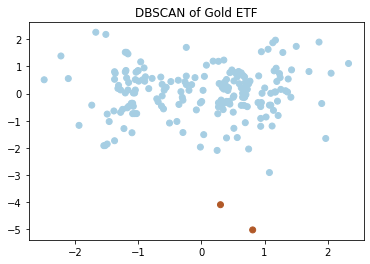

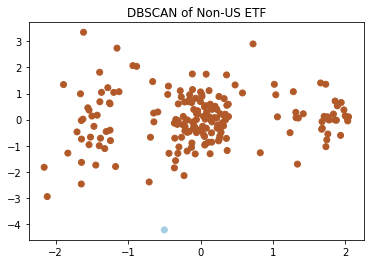

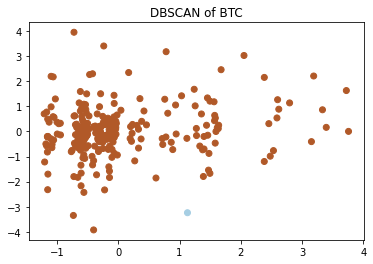

In [ ]:
for df in [(iau_df,'Gold ETF'),(evf_df,'Non-US ETF'),(btc_df,'BTC')]:
  x,title = df
  db_scan(x,title)

# 4.Data Comparison and Graphing

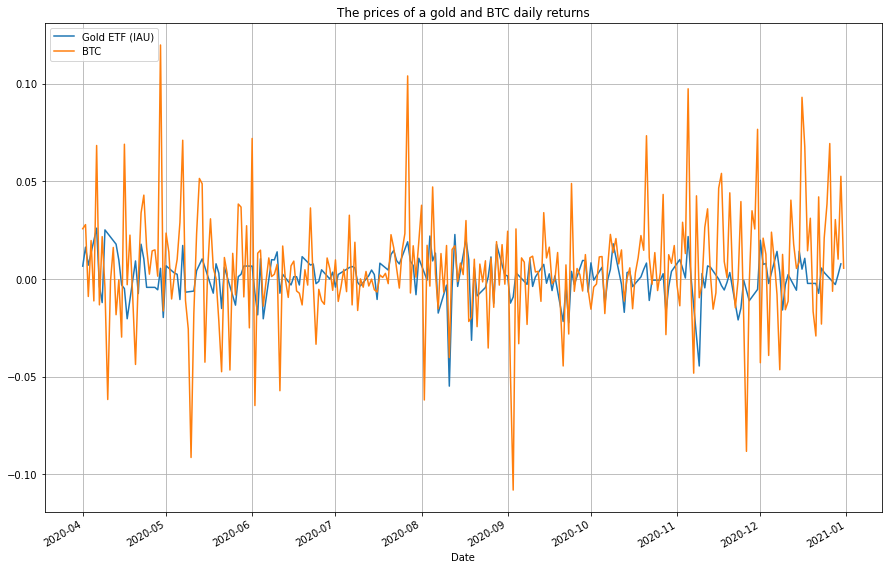

In [ ]:
plt.figure(figsize=(15,10))
plt.title('The prices of a gold and BTC daily returns')

ax1 = iau_df["Return"].plot(label='Gold ETF (IAU)')
ax2 = btc_df["Return"].plot(label='BTC',grid=True)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(l1+l2, loc=2)
plt.show()

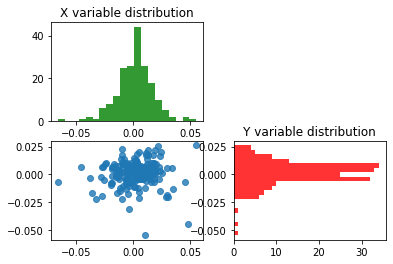

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


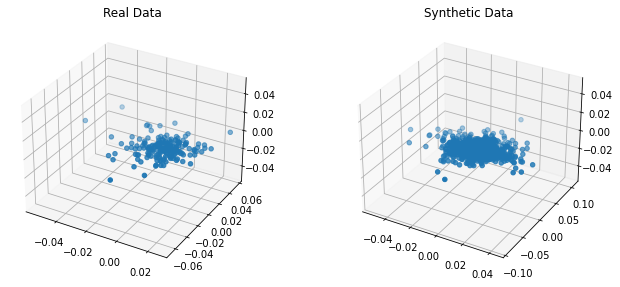

In [ ]:
#Fit a Clayton copula to the returns to EVF vs IAU

# Data and histograms
x = (evf_df["Return"]).values
y = (iau_df['Return']).values
fig = plt.figure()
fig.add_subplot(2,2,1)
plt.hist(x,bins=20,color='green',alpha=0.8,align='mid')
plt.title('X variable distribution')
fig.add_subplot(2,2,3)
plt.scatter(x,y,marker="o",alpha=0.8)
fig.add_subplot(2,2,4)
plt.title('Joint X,Y')
plt.hist(y,bins=20,orientation='horizontal',color='red',alpha=0.8,align='mid')
plt.title('Y variable distribution')
plt.show()
    
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import compare_3d

returns = pd.concat([iau_df['Return'],evf_df["Return"]],axis=1)
returns.columns=['iau','evf']
copula = GaussianMultivariate()
copula.fit(returns)

synthetic_data = copula.sample(1000)
compare_3d(returns, synthetic_data)

# 5.	Category 1 Models
Build ARMA and GARCH strategies that uses only the previous values of that series.

In [ ]:
# For choosing quarterly data
def get_data(df, quarter, column="Return"):
    if quarter == 'Q4':
        return df[(df.index > "2020-09-30")][column]
    elif quarter == 'Q3':
        return df.loc[(df.index > "2020-06-30") & (df.index < "2020-10-01")][column]
    elif quarter == 'Q2':
        return df[(df.index > "2020-03-31") & (df.index < "2020-07-01")][column]

In [ ]:
btc_Q2 = get_data(btc_df, "Q2")
btc_Q3 = get_data(btc_df, "Q3")
btc_Q4 = get_data(btc_df, "Q4")
btc_Q4.head()

Date
2020-10-01   -0.015422
2020-10-02   -0.004103
2020-10-03   -0.002523
2020-10-04    0.011335
2020-10-05    0.011532
Name: Return, dtype: float64

In [ ]:
evf_Q2 = get_data(evf_df, "Q2")
evf_Q3 = get_data(evf_df, "Q3")
evf_Q4 = get_data(evf_df, "Q4")
evf_Q4.head()

Date
2020-10-01    0.001238
2020-10-02    0.001484
2020-10-05    0.017153
2020-10-06   -0.006337
2020-10-07    0.010216
Name: Return, dtype: float64

In [ ]:
import pmdarima as pm

pm.auto_arima(btc_df['Price'],

d=0, # non-seasonal difference order
start_p=1, # initial guess for p
start_q=1, # initial guess for q
max_p=4, # max value of p to test
max_q=4, # max value of q to test                        
                    
seasonal=False, # is the time series seasonal
                    
information_criterion='bic', # used to select best model
trace=True, # print results whilst training
error_action='ignore', # ignore orders that don't work
stepwise=True, # apply intelligent order search
                        
)

Performing stepwise search to minimize bic
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=4112.217, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=5990.696, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=inf, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=inf, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : BIC=4118.678, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[0]             : BIC=4116.832, Time=0.59 sec
 ARIMA(0,0,2)(0,0,0)[0]             : BIC=inf, Time=0.56 sec
 ARIMA(2,0,0)(0,0,0)[0]             : BIC=inf, Time=0.44 sec
 ARIMA(2,0,2)(0,0,0)[0]             : BIC=4123.377, Time=1.40 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=4134.984, Time=1.15 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 5.001 seconds


ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

(-6.368265535758723, 2.3799700809665485e-08, 3, 87, {'1%': -3.5078527246648834, '5%': -2.895382030636155, '10%': -2.584823877658872}, -314.94509196016696)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


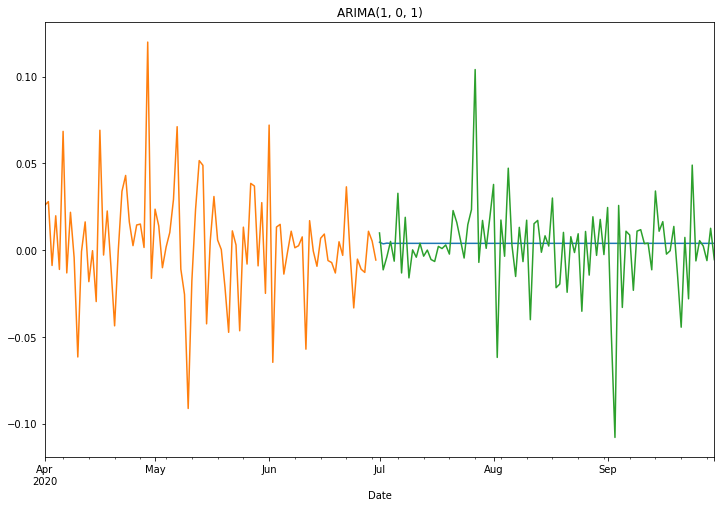

(-10.891008164168056, 1.2251832523968337e-19, 0, 91, {'1%': -3.50434289821397, '5%': -2.8938659630479413, '10%': -2.5840147047458037}, -349.67746955476036)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


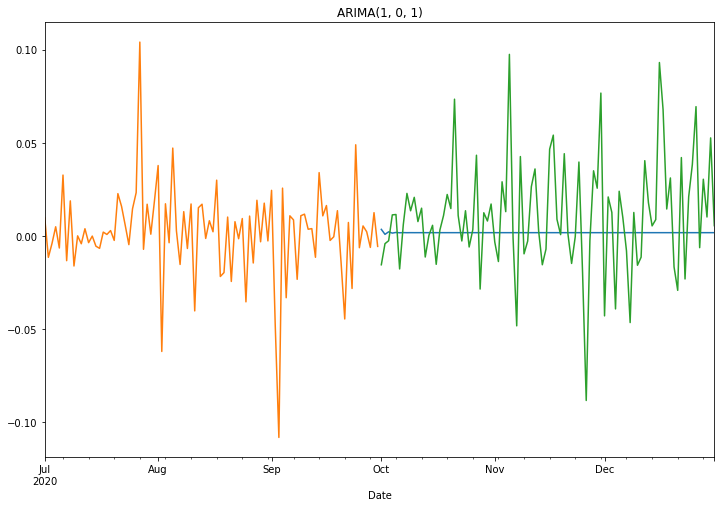

In [ ]:
def my_arima(data,data2):
  print(adfuller(data))
  order=(1,0,1)
  model = ARIMA(data,order=order)
  model_fit = model.fit()
  predict=model_fit.predict(start=len(data),end=len(data)+len(data2)-1)
  #pd.concat([predict,data2],axis=0)
  predict.plot(figsize=(12,8))
  data.plot()
  data2.plot()
  plt.title('ARIMA'+str(order))
  plt.show()

my_arima(btc_Q2, btc_Q3)
my_arima(btc_Q3, btc_Q4)

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009702. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Iteration:      4,   Func. Count:     33,   Neg. LLF: -186.55683704564854
Optimization terminated successfully    (Exit mode 0)
            Current function value: -186.55701156028547
            Iterations: 7
            Function evaluations: 50
            Gradient evaluations: 7
                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                186.557
Distribution:                  Normal   AIC:                          -363.114
Method:            Maximum Likelihood   BIC:                          -350.560
                                        No. Observations:                   91
Date:                Mon, May 02 2022   Df Residuals:                       90
Time:                        03:36:08   Df Model:                            1
      

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006045. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                221.552
Distribution:                  Normal   AIC:                          -433.104
Method:            Maximum Likelihood   BIC:                          -420.495
                                        No. Observations:                   92
Date:                Mon, May 02 2022   Df Residuals:                       91
Time:                        03:36:09   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.9585e-03  1.501e-03      1.305      0.192 

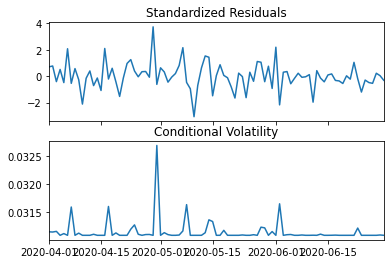

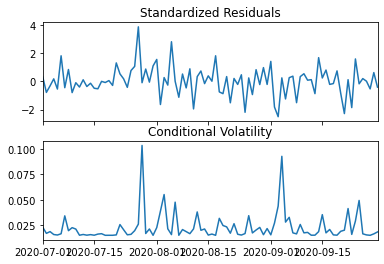

In [ ]:
def fit_garch(data, data2, garch_type="GARCH"):
  garch = arch.arch_model(data, p = 1, q = 1, o = 1, mean = 'constant', vol = 'GARCH')
  garch_fitted = garch.fit(update_freq = 4)
  garch_fitted.plot()
  print(garch_fitted.summary())
  forecast = garch_fitted.forecast(horizon=63, reindex=False)
  print(forecast.residual_variance.iloc[-3:])

fit_garch(btc_Q2, btc_Q3)
print('\n\n*************************************\n\n')
fit_garch(btc_Q3, btc_Q4)

# 6.Category 2 Models

In [ ]:
# Using 2 models
model = my_arima(btc_Q2, evf_Q2)
return_pred = model.predict(exog=ety_Q3, start=btc_Q2.shape[0], end=btc_Q2.shape[0] + btc_Q3.shape[0] - 1).values
signal = np.where(return_pred > 0, 1, -1)
return_Q3 = np.product(btc_Q3 * signal + 1) - 1
return_Q3

0.09974798968709386

In [ ]:
model = fit_arima(btc_Q3, evf_Q3)
return_pred = model.predict(exog=ety_Q4, start=btc_Q3.shape[0], end=btc_Q3.shape[0] + btc_Q4.shape[0] - 1).values
signal = np.where(return_pred > 0, 1, -1)
return_Q4 = np.product(btc_Q4 * signal + 1) - 1
return_Q4

0.8615922366885527

In [ ]:
model = fit_arima(btc_Q2, pd.concat([evf_Q2, iau_Q2], axis=1))
return_pred = model.predict(exog=pd.concat([evf_Q3, iau_Q3], axis=1), start=btc_Q2.shape[0], end=btc_Q2.shape[0] + btc_Q3.shape[0] - 1).values
signal = np.where(return_pred > 0, 1, -1)
return_Q3 = np.product(btc_Q3 * signal + 1) - 1
return_Q3

-0.41684542374790146

In [ ]:
model = fit_arima(btc_Q3, pd.concat([evf_Q3, iau_Q3], axis=1))
return_pred = model.predict(exog=pd.concat([evf_Q4, iau_Q4], axis=1), start=btc_Q3.shape[0], end=btc_Q3.shape[0] + btc_Q4.shape[0] - 1).values
signal = np.where(return_pred > 0, 1, -1)
return_Q4 = np.product(btc_Q4 * signal + 1) - 1
return_Q4

0.5252887692502664

In [ ]:
(1 + return_Q3) * (1 + return_Q4) - 1

-0.11052087410577605

In [ ]:
print(coint(ety_Q2, np.array([btc_Q2, iau_Q2]).T))
print(coint(btc_Q2, np.array([evf_Q2, iau_Q2]).T))
print(coint(iau_Q2, np.array([btc_Q2, evf_Q2]).T))

(-9.009886786838846, 1.0156944304581536e-13, array([-4.55225082, -3.89138389, -3.56042834]))
(-7.631244069155397, 8.482040166297197e-10, array([-4.55225082, -3.89138389, -3.56042834]))
(-8.40672988479475, 5.883619338553873e-12, array([-4.55225082, -3.89138389, -3.56042834]))

In [ ]:
# The p-value in each case above is showing the return series in second quarter are cointegrating

# 7.Category 3 Models


In [ ]:
vec_Q2 = np.array([evf_Q2, btc_Q2, iau_Q2]).T
model = VECM(vec_Q2, coint_rank=1)
vecm_res = model.fit()
res = vecm_res.predict(steps=63)
row_sums = res.sum(axis=1)
weights = res / row_sums[:, np.newaxis]
weights

array([[ 0.3039055 ,  0.82756673, -0.13147223],
       [ 0.32094165, -0.01073344,  0.68979179],
       [ 0.21208777,  1.49979789, -0.71188566],
       [-0.20291885,  2.69954302, -1.49662417],
       [ 0.18088223,  3.38632372, -2.56720595],
       [-0.10080642,  3.16358436, -2.06277794],
       [ 0.00987048,  2.52988315, -1.53975363],
       [-0.02685625,  3.01951263, -1.99265637],
       [-0.01870451,  2.94181383, -1.92310932],
       [-0.01730372,  2.78161022, -1.76430649],
       [-0.01861945,  2.90369603, -1.88507658],
       [-0.01769421,  2.87492561, -1.8572314 ],
       [-0.01920038,  2.86452745, -1.84532707],
       [-0.0172872 ,  2.86406531, -1.84677811],
       [-0.01890775,  2.87882514, -1.85991739],
       [-0.01789314,  2.86450408, -1.84661095],
       [-0.01844556,  2.87105828, -1.85261271],
       [-0.01810538,  2.86976142, -1.85165603],
       [-0.01835759,  2.87009574, -1.85173815],
       [-0.018173  ,  2.86911815, -1.85094515],
       [-0.01828939,  2.8702629 , -1.85197351],
       [-0.01822526,  2.8695675 , -1.85134224],
       [-0.01826058,  2.86979851, -1.85153793],
       [-0.01823815,  2.86974974, -1.85151159],
       [-0.01825363,  2.86980213, -1.8515485 ],
       [-0.01824368,  2.86972788, -1.8514842 ],
       [-0.0182493 ,  2.86978473, -1.85153543],
       [-0.01824633,  2.86975996, -1.85151363],
       [-0.01824803,  2.86976584, -1.85151781],
       [-0.01824692,  2.86976347, -1.85151656],
       [-0.01824765,  2.86976739, -1.85151975],
       [-0.01824722,  2.8697635 , -1.85151628],
       [-0.01824744,  2.86976565, -1.85151821],
       [-0.01824732,  2.86976502, -1.8515177 ],
       [-0.0182474 ,  2.86976513, -1.85151773],
       [-0.01824735,  2.86976497, -1.85151763],
       [-0.01824738,  2.8697652 , -1.85151782],
       [-0.01824736,  2.86976504, -1.85151767],
       [-0.01824737,  2.8697651 , -1.85151773],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976508, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772],
       [-0.01824737,  2.86976509, -1.85151772]])

In [ ]:
vec_Q3 = np.array([evf_Q3, btc_Q3, iau_Q3]).T

In [ ]:
return_Q3 = weights * vec_Q3
total_return_Q3 = return_Q3.sum(axis=1)
portfolio_return_Q3 = np.product(total_return_Q3 + 1) - 1
portfolio_return_Q3

0.18771531918562823

In [ ]:
print(coint(evf_Q3, np.array([btc_Q3, iau_Q3]).T))
print(coint(btc_Q3, np.array([ety_Q3, iau_Q3]).T))
print(coint(iau_Q3, np.array([btc_Q3, evf_Q3]).T))

(-0.900653458018321, 0.9727450043898902, array([-4.53500554, -3.88148182, -3.55337787]))
(-9.347212419636183, 9.90002470276579e-15, array([-4.53500554, -3.88148182, -3.55337787]))
(-3.2014323597751666, 0.1680589114665484, array([-4.53500554, -3.88148182, -3.55337787]))

In [ ]:
# The p-value above signifies that only the Bitcoin return series and combination of equity and gold return series are cointegrating. 
#In other two scenarios we reject the null hypothesis for existance of cointegration

In [ ]:
model = VECM(vec_Q3, coint_rank=1)
vecm_res = model.fit()
res = vecm_res.predict(steps=59)
row_sums = res.sum(axis=1)
weights = res / row_sums[:, np.newaxis]
weights

array([[-1.97763650e-01,  8.39190468e-01,  3.58573182e-01],
       [-1.33874486e-01,  3.24377724e-01,  8.09496762e-01],
       [ 4.58705843e-02,  8.09891546e-01,  1.44237870e-01],
       [ 1.11170305e-01,  1.45069806e+00, -5.61868361e-01],
       [ 5.70959502e-02,  8.76650294e-01,  6.62537562e-02],
       [ 6.69665634e-02,  1.00329264e+00, -7.02592047e-02],
       [ 6.05712290e-02,  9.12452555e-01,  2.69762157e-02],
       [ 6.29518977e-02,  9.53516067e-01, -1.64679649e-02],
       [ 6.16937397e-02,  9.27494836e-01,  1.08114245e-02],
       [ 6.22007688e-02,  9.41266556e-01, -3.46732435e-03],
       [ 6.19823274e-02,  9.33014761e-01,  5.00291113e-03],
       [ 6.20539865e-02,  9.37632684e-01,  3.13329886e-04],
       [ 6.20399834e-02,  9.34920738e-01,  3.03927892e-03],
       [ 6.20318594e-02,  9.36475199e-01,  1.49294173e-03],
       [ 6.20456532e-02,  9.35566358e-01,  2.38798904e-03],
       [ 6.20325241e-02,  9.36093796e-01,  1.87368000e-03],
       [ 6.20430817e-02,  9.35784921e-01,  2.17199739e-03],
       [ 6.20352957e-02,  9.35965585e-01,  1.99911962e-03],
       [ 6.20407709e-02,  9.35859399e-01,  2.09983017e-03],
       [ 6.20370482e-02,  9.35921870e-01,  2.04108188e-03],
       [ 6.20395239e-02,  9.35885002e-01,  2.07547373e-03],
       [ 6.20379059e-02,  9.35906795e-01,  2.05529959e-03],
       [ 6.20389501e-02,  9.35893884e-01,  2.06716628e-03],
       [ 6.20382831e-02,  9.35901545e-01,  2.06017145e-03],
       [ 6.20387058e-02,  9.35896990e-01,  2.06430399e-03],
       [ 6.20384397e-02,  9.35899703e-01,  2.06185770e-03],
       [ 6.20386063e-02,  9.35898085e-01,  2.06330861e-03],
       [ 6.20385025e-02,  9.35899051e-01,  2.06244656e-03],
       [ 6.20385669e-02,  9.35898473e-01,  2.06295959e-03],
       [ 6.20385271e-02,  9.35898819e-01,  2.06265381e-03],
       [ 6.20385517e-02,  9.35898612e-01,  2.06283632e-03],
       [ 6.20385365e-02,  9.35898736e-01,  2.06272725e-03],
       [ 6.20385458e-02,  9.35898662e-01,  2.06279251e-03],
       [ 6.20385401e-02,  9.35898706e-01,  2.06275342e-03],
       [ 6.20385436e-02,  9.35898680e-01,  2.06277686e-03],
       [ 6.20385415e-02,  9.35898696e-01,  2.06276279e-03],
       [ 6.20385428e-02,  9.35898686e-01,  2.06277124e-03],
       [ 6.20385420e-02,  9.35898692e-01,  2.06276616e-03],
       [ 6.20385425e-02,  9.35898688e-01,  2.06276921e-03],
       [ 6.20385422e-02,  9.35898690e-01,  2.06276738e-03],
       [ 6.20385423e-02,  9.35898689e-01,  2.06276848e-03],
       [ 6.20385422e-02,  9.35898690e-01,  2.06276782e-03],
       [ 6.20385423e-02,  9.35898689e-01,  2.06276822e-03],
       [ 6.20385423e-02,  9.35898690e-01,  2.06276798e-03],
       [ 6.20385423e-02,  9.35898690e-01,  2.06276812e-03],
       [ 6.20385423e-02,  9.35898690e-01,  2.06276803e-03],
       [ 6.20385423e-02,  9.35898690e-01,  2.06276809e-03],
       [ 6.20385423e-02,  9.35898690e-01,  2.06276806e-03],
       [ 6.20385423e-02,  9.35898690e-01,  2.06276808e-03],
       [ 6.20385423e-02,  9.35898690e-01,  2.06276806e-03],
       [ 6.20385423e-02,  9.35898690e-01,  2.06276807e-03],
       [ 6.20385423e-02,  9.35898690e-01,  2.06276807e-03],
       [ 6.20385423e-02,  9.35898690e-01,  2.06276807e-03],
       [ 6.20385423e-02,  9.35898690e-01,  2.06276807e-03],
       [ 6.20385423e-02,  9.35898690e-01,  2.06276807e-03],
       [ 6.20385423e-02,  9.35898690e-01,  2.06276807e-03],
       [ 6.20385423e-02,  9.35898690e-01,  2.06276807e-03],
       [ 6.20385423e-02,  9.35898690e-01,  2.06276807e-03],
       [ 6.20385423e-02,  9.35898690e-01,  2.06276807e-03]])

In [ ]:
vec_Q4 = np.array([evf_Q4, btc_Q4, iau_Q4]).T

In [ ]:
return_Q4 = weights * vec_Q4
total_return_Q4 = return_Q4.sum(axis=1)
portfolio_return_Q4 = np.product(total_return_Q4 + 1) - 1
portfolio_return_Q4

1.4225981489052275

In [ ]:
(1 + portfolio_return_Q3) * (1 + portfolio_return_Q4) - 1

1.8773569336854843

In [ ]:
# We can see that the VECM is the best performing model with highest returns from the portfolio returns.